This notebook demonstrates the Superdense Coding (SDC) protocol. We first use Qiskit's simulator to test our quantum circuit, and then try it out on a real quantum computer.

## 1. The Difference between Superdense Coding and Quantum Teleportation

Quantum teleportation is a process by which the state of qubit $|\psi>$ can be transmitted from one location to another using two bits of classical communication and a Bell pair. In other workds, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location, with the help of shared entanglement. Superdense coding is a procedure that allows someone to send two classical bits to another party using a single qubit of communication.

## 3. Simulating the Superdense Coding Protocol

In [1]:
#Importing everything
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
# Define a function that takes a QuantumCircuit(qc)
# and two integers (a & b)
def create_bell_pair(qc, a, b):
    qc.h(a) # Apply a h-gate to the first qubit
    qc.cx(a,b) # Apply a CNOT, using the first qubit as the control

In [3]:
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass
    elif msg == "10":
        qc.x(qubit)
    elif msg == "01":
        qc.z(qubit)
    elif msg == "11":
        qc.x(qubit)
        qc.z(qubit)
    else:
        print("invalid message: sending '00'")

In [4]:
def decode_message(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

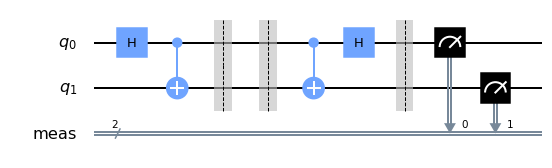

In [5]:
qc = QuantumCircuit(2)
# create entangled pair between Alice and Bob
create_bell_pair(qc, 0, 1)
qc.barrier()
# from this point, qubit 0 goes to Alice and qubit 1 goes to Bob
message = "00"
encode_message(qc, 0, message)
qc.barrier()
#Alice sends her qubit to Bob
#Now Bob applies decode procedure
decode_message(qc, 0, 1)
#Bob measures his qubits to read Alice's message
qc.measure_all()
qc.draw(output='mpl')

{'00': 1024}


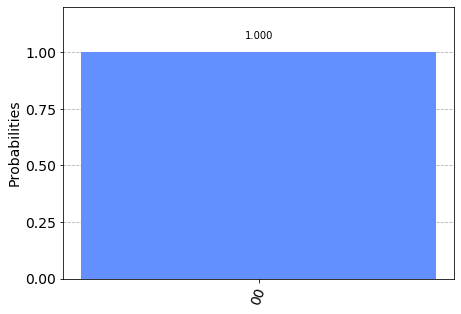

In [6]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

## 4. Superdense coding on a real quantum computer

In [7]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational == True))
print("least busy backend: ", backend)
job = execute(qc, backend=backend, shots=shots)

/home/sheff/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmq_valencia


In [8]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


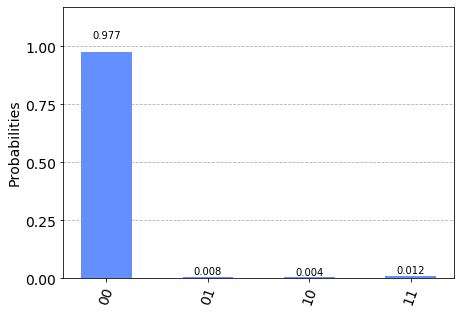

In [9]:
result = job.result()
plot_histogram(result.get_counts(qc))

In [10]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 97.66%


In [11]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.10.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.22.0'}